# Exploratory Data Analysis

This notebook will be about the Exploratory Data Analysis.

For data visualization, we rely on Matplotlib and Seaborn, a visualization library built on top of `Matplotlib`, to create various types of visualizations, including pie plots, histograms, line plots, and more.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

## Loading the data

In [5]:
path="./dataset/"
file="final_dataset.csv"
users_csv="cleaned_users.csv"
books_csv="cleaned_books.csv"
ratings_csv="cleaned_ratings.csv"

In [6]:
books = pd.read_csv(path+books_csv, sep=";",on_bad_lines='warn', encoding="latin-1")
ratings =  pd.read_csv(path+ratings_csv, sep=";",on_bad_lines='warn', encoding="latin-1")
users = pd.read_csv(path+users_csv, sep=";",on_bad_lines='warn', encoding="latin-1")
df_recommendation = pd.read_csv(path+file, sep=";",on_bad_lines='warn', encoding="latin-1")

In [7]:
books.shape

(271379, 6)

<a id='eda'></a>
## Exploratory Data Analysis

<a id="eda">Exploratory Data Analysis</a>

In [8]:
round(users.Age.mean())

35

The average age of the user is approximatively 35.

The distribution of ratings is:

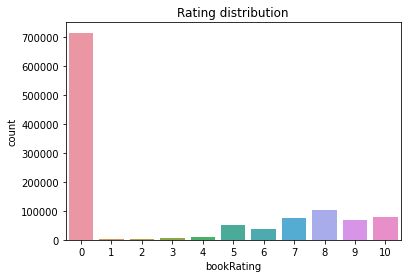

In [9]:
sns.countplot(x="bookRating",data=ratings)
plt.title("Rating distribution")
plt.show()

In [10]:
ratings.bookRating.value_counts(normalize=True)

0     0.622823
8     0.090222
10    0.068370
7     0.066497
9     0.058743
5     0.044334
6     0.032114
4     0.007744
3     0.005215
2     0.002400
1     0.001539
Name: bookRating, dtype: float64

We observe that 62% of the ratings are equal to 0, which is a significant portion of the data set. Rating of 0 means  that the book was not explicitly rated  by the user. The score 0 corresponds to the implicit rating. only the explicit rating using be used to build our Recommender system. We will drop the implicit rating once the EDA is done.

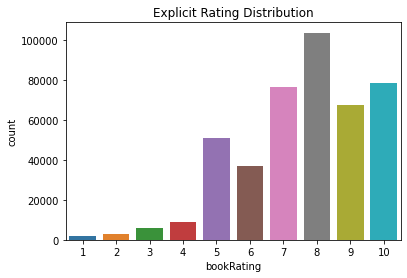

In [11]:
sns.countplot(x="bookRating", data=ratings[ratings["bookRating"]!=0])
plt.title("Explicit Rating Distribution")
plt.show()

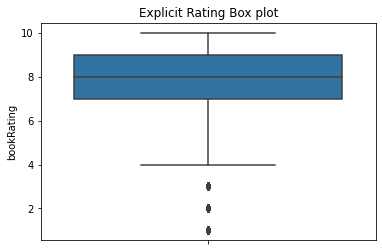

In [12]:
sns.boxplot(y="bookRating", data=ratings[ratings["bookRating"]!=0])
plt.title("Explicit Rating Box plot")
plt.show()

Only 25% of the books have explicit rating less than 7. The score 8 is the most represented rating so most user are happy with their books. It should also be easy to recommend good books to one user based on the liking of the others

### User dataset EDA

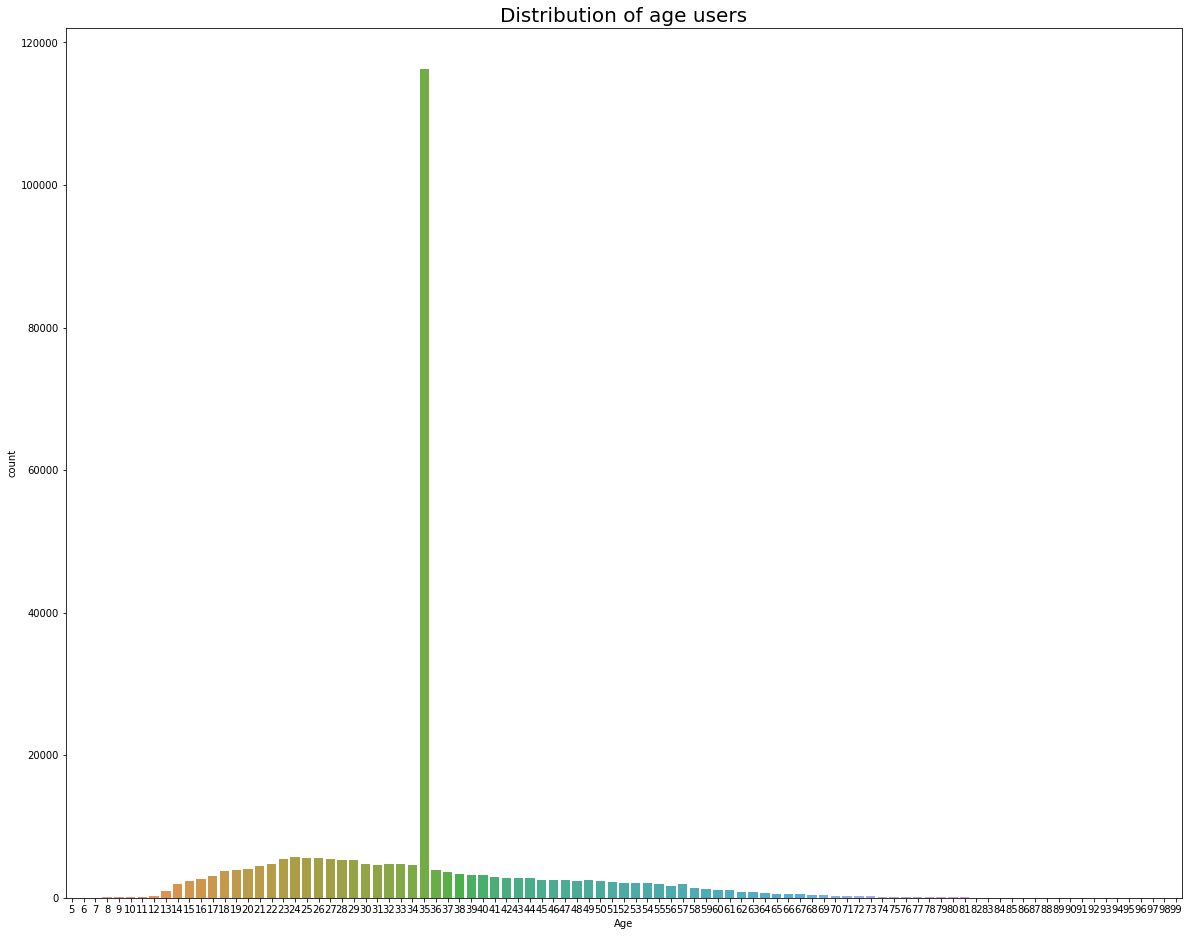

In [13]:
plt.figure(figsize=(20,16))
sns.countplot(x="Age", data=users)
plt.title("Distribution of age users", size=20)
plt.show()

We observe a pic at 35 wich is logical as we have replaced all na and extremum values by 35 to preserve the mean of the dataset

If we remove the 35 value, we see a distribution narrow at the low age and descrising after 35. This is coherent with the public reading and ratings books. It's generally adolescent and adult that read and used application ratings. 

In [14]:
bins = [5, 12, 18, 35, 65, np.inf]
names = ['5-12', '12-18', '18-35', '35-65','65+']
users['AgeCategory'] = pd.cut(users['Age'], bins, labels=names)
users.head(10)

,userID,Age,city,state,country,AgeCategory
0,1,35,nyc,new york,usa,18-35
1,2,18,stockton,california,usa,12-18
2,3,35,moscow,yukon territory,russia,18-35
3,4,17,porto,v.n.gaia,portugal,12-18
4,5,35,farnborough,hants,united kingdom,18-35
5,6,61,santa monica,california,usa,35-65
6,7,35,washington,dc,usa,18-35
7,8,35,timmins,ontario,canada,18-35
8,9,35,germantown,tennessee,usa,18-35
9,10,26,albacete,wisconsin,spain,18-35


In [15]:
#ageRepartition=users[["userID", "AgeCategory"]].groupby("AgeCategory").count()
ageRepartition=users[["userID", "AgeCategory"]].value_counts("AgeCategory")
ageRepartition.columns=["count"]
ageRepartition.head(10)

AgeCategory
18-35    195279
35-65     64734
12-18     14547
65+        3714
5-12        558
dtype: int64

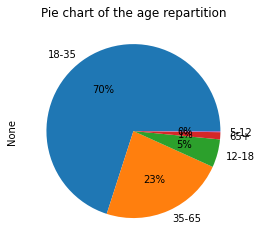

In [16]:
plt=ageRepartition.plot(kind="pie",y="count", autopct='%1.0f%%',title="Pie chart of the age repartition")

Even by removing the people of 35 years old, we see that the 18-35 category is the most represented.

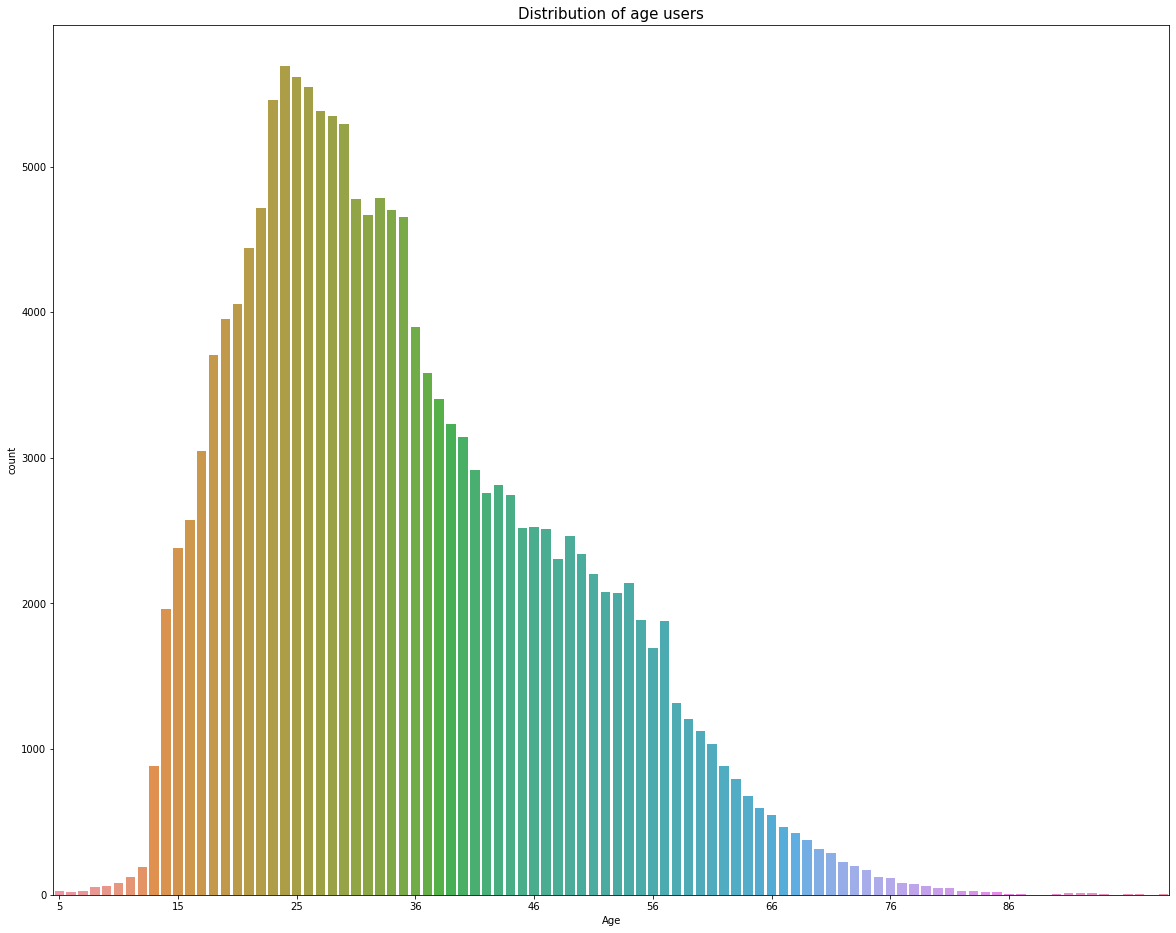

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
fig=sns.countplot(x="Age", data=users[users.Age!=35])
fig.set_xticks(range(0,90,10))
plt.title("Distribution of age users", size=15)
plt.show()

### Books dataset EDA

number of author publish per year

In [18]:
df_author_per_year=books[books["yearOfPublication"]>1900].groupby("yearOfPublication", as_index=False)[["bookTitle"]].count()
df_author_per_year.columns=["year","nbBooks"]

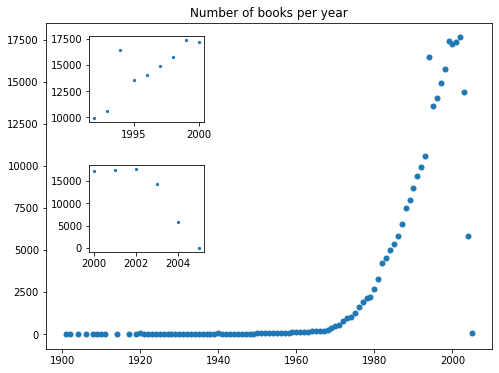

In [19]:
fig=plt.figure(figsize=(8,6))
ax1=plt.scatter(x="year",y="nbBooks",data=df_author_per_year,s=25)
plt.title("Number of books per year")
ax_new=fig.add_axes([0.2, 0.65, 0.2, 0.2])
zoom=df_author_per_year[df_author_per_year['year'].between(1992,2000)]
plt.scatter(x="year",y="nbBooks",data=zoom ,s=5)

ax_new2=fig.add_axes([0.2, 0.35, 0.2, 0.2])
zoom2=df_author_per_year[df_author_per_year['year'].between(2000,2005)]
plt.scatter(x="year",y="nbBooks",data=zoom2 ,s=5)


We observe that after 1960, the number of books edited is constantly increasing altough the years 1994 and 1999 are little descrepancies. 
We also see that the number of books edited decrease after 2002. It is logical for 2004 and after as the dataset was make in middle 2004.

The most edited author are:

In [20]:
books["bookAuthor"].value_counts().head(10)

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        373
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: bookAuthor, dtype: int64

Without surprise we observe that the most edited are classical author (Agatha Christie, William Shakespeare, Charles Dickens, Isaac Asimov as the father of modern SF)  edited for many years hence regularly republished. Carolyn Keene is the pseudonyme of various author and the others are prolific author of the second part of the twentieth century. Barbara Cartland is well know to be the most prolific author of all this century.

### Merged data

In [21]:
df_recommendation["bookTitle"].value_counts().head(10)

The Lovely Bones: A Novel                          707
Wild Animus                                        581
The Da Vinci Code                                  494
The Secret Life of Bees                            402
The Nanny Diaries: A Novel                         391
The Red Tent (Bestselling Backlist)                383
Bridget Jones's Diary                              367
A Painted House                                    363
Life of Pi                                         335
Divine Secrets of the Ya-Ya Sisterhood: A Novel    323
Name: bookTitle, dtype: int64

In [22]:
most_read_author=df_recommendation["bookAuthor"].value_counts()
most_read_author.head(10)

Stephen King          4587
Nora Roberts          2929
John Grisham          2533
James Patterson       2369
J. K. Rowling         1729
Mary Higgins Clark    1670
Janet Evanovich       1487
Dean R. Koontz        1470
Anne Rice             1241
Sue Grafton           1234
Name: bookAuthor, dtype: int64

The most read author is Stephen King. It's interesting to see he's the only author from the ten most edited author of the book dataset to be in this list.

Number of book read and rated by users.
We start by removing books with ratings equals to 0.

In [23]:
df_recommendation["userID"].value_counts().describe()

count    68093.000000
mean         5.622164
std         40.944815
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6695.000000
Name: userID, dtype: float64

In [24]:
df_recommendation["userID"].value_counts().head()

11676     6695
98391     5652
189835    1826
153662    1821
23902     1170
Name: userID, dtype: int64

In [25]:
df_recommendation[df_recommendation["userID"]==23902]

,userID,Age,city,state,country,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,bookId
35319,23902,35,london,england,united kingdom,0600387682,7,100 years of the Wimbledon tennis championships,James Medlycott,1977.0,Hamlyn,39923
35320,23902,35,london,england,united kingdom,1565990455,6,1st Corinthians (Enduring Word Commentary),David Guzik,2001.0,Enduring Word Media,40072
35321,23902,35,london,england,united kingdom,0060168412,7,365 Ways to Cook Fish and Shellfish,Charles Pierce,1993.0,Harpercollins,39997
35322,23902,35,london,england,united kingdom,2277219517,10,372 Le Matin,Philippe Djian,1994.0,Kurtzman Sales Inc,5244
35323,23902,35,london,england,united kingdom,0451203895,7,4 Blondes,Candace Bushnell,2002.0,Signet Book,3637
...,...,...,...,...,...,...,...,...,...,...,...,...
36484,23902,35,london,england,united kingdom,0553261738,8,You Can Get There from Here,Shirley MacLaine,1976.0,Bantam Books,39631
36485,23902,35,london,england,united kingdom,1843580020,6,Your Personal Trainer,"Kathy, Dr Fulcher",2002.0,Trafalgar Square,40073
36486,23902,35,london,england,united kingdom,0855330902,6,Your indoor garden: The comprehensive guide to...,George Seddon,1976.0,Mitchell Beazley,39867
36487,23902,35,london,england,united kingdom,8385412565,8,Zakopane (DookoÃÂ±a Polski),Joanna Markin,1995.0,Pascal,39846


The average number of books rated by users is near 6 but 75% of the users have rated only 1 books and the rest have rated at least 3 books. It should be enough for recommending books based on the ratings of other users but it may be too narrow to recommend a large quantity of books. It should be noted that some users have rated more than 1000 books so we have a huge variance. We keep them but it's to be noted to reflect on the validity of the model we are going to do.

In [26]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

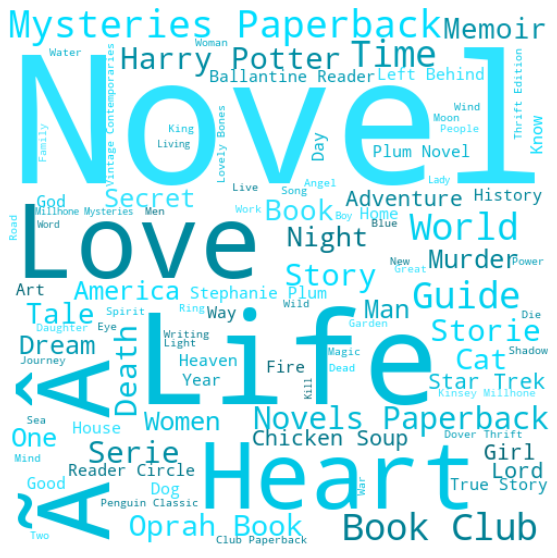

In [27]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=52, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df_recommendation['bookTitle']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

The word the most present in boks read by users is "Love", "Life" and "Novel".

## Recommendation system
This end the EDA part, in the next jupyter notebook, [book_predictions](book_predictions.ipynb) will be about building recommendation system for books.